Dữ liệu mẫu: X.shape = (100, 2) | y.unique = [0 1]
Số support vectors: [1 1]
Support vectors:
 [[ 7.27059007 -4.84225716]
 [ 6.49868019 -7.13530714]]


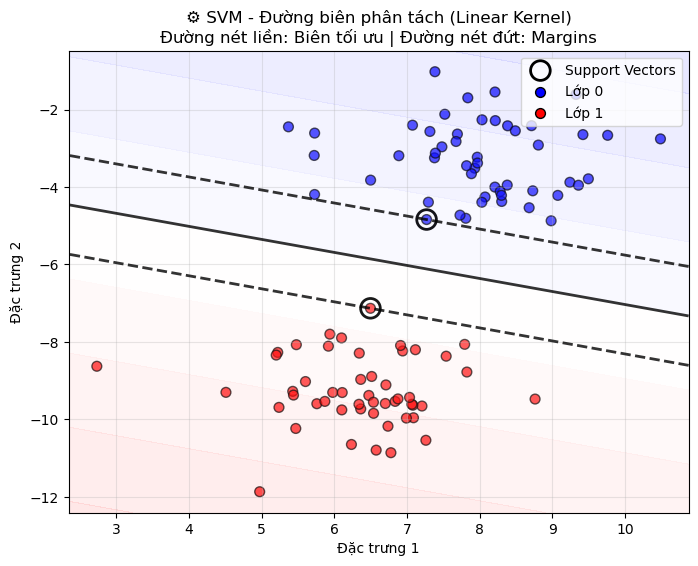

🌟 Mẫu mới [[ 3.  -4.7]] được dự đoán là lớp: 1


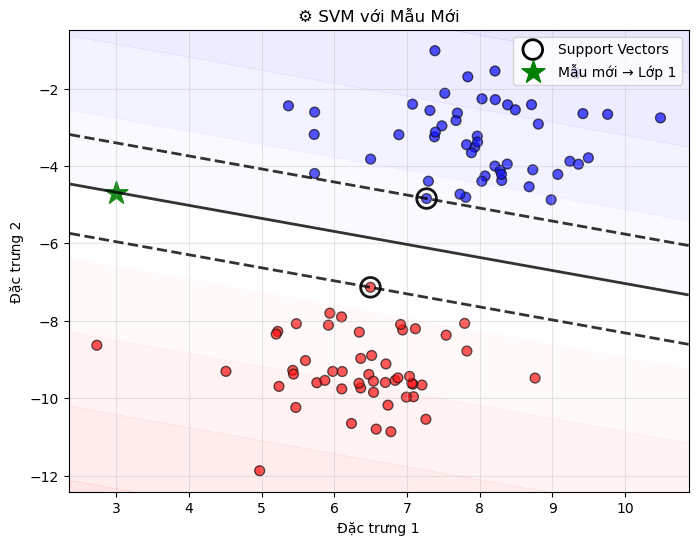

In [10]:
# SVM - Phân loại 2D trực quan
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# 1. Tạo dữ liệu 2 lớp (dễ phân tách tuyến tính)
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)
print("Dữ liệu mẫu: X.shape =", X.shape, "| y.unique =", np.unique(y))

# 2. Huấn luyện SVM với kernel tuyến tính
svm = SVC(kernel='linear')
svm.fit(X, y)
print("Số support vectors:", svm.n_support_)
print("Support vectors:\n", svm.support_vectors_)

# 3. Vẽ biểu đồ
plt.figure(figsize=(8, 6))
# Vẽ các điểm dữ liệu với màu sắc (lớp 0: đỏ, lớp 1: xanh dương)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50, edgecolor='k', alpha=0.7)
# Vẽ support vectors (điểm quan trọng nhất)
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], 
            s=200, facecolors='none', edgecolors='k', linewidth=2, label='Support Vectors')

# Tạo lưới để vẽ đường biên
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ đường biên phân tách (decision boundary) và margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], 
            alpha=0.8, linestyles=['--', '-', '--'], linewidths=2)
plt.contourf(xx, yy, Z, alpha=0.1, cmap='bwr')  # Tô màu vùng phân loại

# Thêm chú thích cho các lớp
for label in np.unique(y):
    color = 'blue' if label == 0 else 'red'  # Ánh xạ màu từ cmap='bwr'
    plt.scatter([], [], c=color, label=f'Lớp {label}', edgecolor='k', s=50)

# Thêm chú thích
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')
plt.title("⚙️ SVM - Đường biên phân tách (Linear Kernel)\nĐường nét liền: Biên tối ưu | Đường nét đứt: Margins")
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

# 4. Dự đoán mẫu mới
new_sample = np.array([[3, -4.7]])  # Mẫu mới (thay đổi giá trị để thử nghiệm)
prediction = svm.predict(new_sample)[0]
print(f"🌟 Mẫu mới {new_sample} được dự đoán là lớp: {prediction}")

# Vẽ mẫu mới trên biểu đồ
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50, edgecolor='k', alpha=0.7)
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], 
            s=200, facecolors='none', edgecolors='k', linewidth=2, label='Support Vectors')
plt.scatter(new_sample[0, 0], new_sample[0, 1], c='green', marker='*', s=300, 
            label=f'Mẫu mới → Lớp {prediction}')
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], 
            alpha=0.8, linestyles=['--', '-', '--'], linewidths=2)
plt.contourf(xx, yy, Z, alpha=0.1, cmap='bwr')
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')
plt.title("⚙️ SVM với Mẫu Mới")
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()